# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographical_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.majority, past=Past.all, durl=Durl.all)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 18511 substitutions for model Model(time=Time.discrete, source=Source.majority, past=Past.all, durl=Durl.all)


  0% (    1 of 18511) |           | Elapsed Time: 0:00:26 ETA:  5 days, 14:19:15

  0% (   82 of 18511) |                    | Elapsed Time: 0:00:27 ETA:  0:03:21

  0% (  163 of 18511) |                    | Elapsed Time: 0:00:28 ETA:  0:03:22

  1% (  232 of 18511) |                    | Elapsed Time: 0:00:29 ETA:  0:03:24

  1% (  319 of 18511) |                    | Elapsed Time: 0:00:30 ETA:  0:03:18

  2% (  402 of 18511) |                    | Elapsed Time: 0:00:31 ETA:  0:03:16

  2% (  463 of 18511) |                    | Elapsed Time: 0:00:31 ETA:  0:03:15

  2% (  544 of 18511) |                    | Elapsed Time: 0:00:32 ETA:  0:03:15

  3% (  628 of 18511) |                    | Elapsed Time: 0:00:33 ETA:  0:03:13

  3% (  695 of 18511) |                    | Elapsed Time: 0:00:34 ETA:  0:03:14

  4% (  772 of 18511) |                    | Elapsed Time: 0:00:35 ETA:  0:03:14

  4% (  850 of 18511) |                    | Elapsed Time: 0:00:36 ETA:  0:03:14

  5% (  926 of 18511) |#                   | Elapsed Time: 0:00:37 ETA:  0:03:13

  5% ( 1004 of 18511) |#                   | Elapsed Time: 0:00:38 ETA:  0:03:15

  5% ( 1083 of 18511) |#                   | Elapsed Time: 0:00:39 ETA:  0:03:15

  6% ( 1157 of 18511) |#                   | Elapsed Time: 0:00:40 ETA:  0:03:17

  6% ( 1243 of 18511) |#                   | Elapsed Time: 0:00:41 ETA:  0:03:15

  7% ( 1324 of 18511) |#                   | Elapsed Time: 0:00:42 ETA:  0:03:13

  7% ( 1389 of 18511) |#                   | Elapsed Time: 0:00:43 ETA:  0:03:09

  7% ( 1471 of 18511) |#                   | Elapsed Time: 0:00:44 ETA:  0:03:07

  8% ( 1548 of 18511) |#                   | Elapsed Time: 0:00:45 ETA:  0:03:06

  8% ( 1620 of 18511) |#                   | Elapsed Time: 0:00:46 ETA:  0:03:05

  9% ( 1704 of 18511) |#                   | Elapsed Time: 0:00:47 ETA:  0:03:02

  9% ( 1716 of 18511) |#                   | Elapsed Time: 0:00:48 ETA:  0:03:26

  9% ( 1793 of 18511) |#                   | Elapsed Time: 0:00:49 ETA:  0:03:23

 10% ( 1852 of 18511) |##                  | Elapsed Time: 0:00:50 ETA:  0:03:27

 10% ( 1933 of 18511) |##                  | Elapsed Time: 0:00:51 ETA:  0:03:26

 10% ( 2012 of 18511) |##                  | Elapsed Time: 0:00:52 ETA:  0:03:27

 11% ( 2083 of 18511) |##                  | Elapsed Time: 0:00:53 ETA:  0:03:27

 11% ( 2157 of 18511) |##                  | Elapsed Time: 0:00:54 ETA:  0:03:28

 12% ( 2234 of 18511) |##                  | Elapsed Time: 0:00:55 ETA:  0:03:27

 12% ( 2314 of 18511) |##                  | Elapsed Time: 0:00:56 ETA:  0:03:03

 12% ( 2391 of 18511) |##                  | Elapsed Time: 0:00:57 ETA:  0:03:02

 13% ( 2473 of 18511) |##                  | Elapsed Time: 0:00:58 ETA:  0:02:59

 13% ( 2546 of 18511) |##                  | Elapsed Time: 0:00:59 ETA:  0:02:57

 14% ( 2629 of 18511) |##                  | Elapsed Time: 0:01:00 ETA:  0:02:54

 14% ( 2709 of 18511) |##                  | Elapsed Time: 0:01:01 ETA:  0:02:53

 15% ( 2777 of 18511) |###                 | Elapsed Time: 0:01:01 ETA:  0:02:48

 15% ( 2862 of 18511) |###                 | Elapsed Time: 0:01:02 ETA:  0:02:44

 15% ( 2936 of 18511) |###                 | Elapsed Time: 0:01:03 ETA:  0:02:45

 16% ( 3009 of 18511) |###                 | Elapsed Time: 0:01:04 ETA:  0:02:44

 16% ( 3093 of 18511) |###                 | Elapsed Time: 0:01:05 ETA:  0:02:41

 17% ( 3165 of 18511) |###                 | Elapsed Time: 0:01:06 ETA:  0:02:43

 17% ( 3240 of 18511) |###                 | Elapsed Time: 0:01:07 ETA:  0:02:43

 17% ( 3307 of 18511) |###                 | Elapsed Time: 0:01:08 ETA:  0:02:48

 18% ( 3383 of 18511) |###                 | Elapsed Time: 0:01:09 ETA:  0:02:48

 18% ( 3471 of 18511) |###                 | Elapsed Time: 0:01:10 ETA:  0:02:52

 19% ( 3555 of 18511) |###                 | Elapsed Time: 0:01:11 ETA:  0:02:47

 19% ( 3639 of 18511) |###                 | Elapsed Time: 0:01:12 ETA:  0:02:45

 20% ( 3703 of 18511) |####                | Elapsed Time: 0:01:13 ETA:  0:02:46

 20% ( 3783 of 18511) |####                | Elapsed Time: 0:01:14 ETA:  0:02:42

 20% ( 3867 of 18511) |####                | Elapsed Time: 0:01:15 ETA:  0:02:40

 21% ( 3934 of 18511) |####                | Elapsed Time: 0:01:16 ETA:  0:02:33

 21% ( 4019 of 18511) |####                | Elapsed Time: 0:01:17 ETA:  0:02:29

 22% ( 4105 of 18511) |####                | Elapsed Time: 0:01:18 ETA:  0:02:25

 22% ( 4165 of 18511) |####                | Elapsed Time: 0:01:19 ETA:  0:02:23

 22% ( 4250 of 18511) |####                | Elapsed Time: 0:01:20 ETA:  0:02:22

 23% ( 4333 of 18511) |####                | Elapsed Time: 0:01:21 ETA:  0:02:21

 23% ( 4397 of 18511) |####                | Elapsed Time: 0:01:22 ETA:  0:02:20

 24% ( 4472 of 18511) |####                | Elapsed Time: 0:01:23 ETA:  0:02:21

 24% ( 4555 of 18511) |####                | Elapsed Time: 0:01:24 ETA:  0:02:20

 25% ( 4628 of 18511) |#####               | Elapsed Time: 0:01:24 ETA:  0:02:20

 25% ( 4712 of 18511) |#####               | Elapsed Time: 0:01:25 ETA:  0:02:19

 25% ( 4794 of 18511) |#####               | Elapsed Time: 0:01:26 ETA:  0:02:20

 26% ( 4860 of 18511) |#####               | Elapsed Time: 0:01:27 ETA:  0:02:18

 26% ( 4939 of 18511) |#####               | Elapsed Time: 0:01:28 ETA:  0:02:20

 26% ( 4955 of 18511) |#####               | Elapsed Time: 0:01:30 ETA:  0:02:51

 27% ( 5035 of 18511) |#####               | Elapsed Time: 0:01:31 ETA:  0:02:49

 27% ( 5091 of 18511) |#####               | Elapsed Time: 0:01:31 ETA:  0:02:48

 27% ( 5173 of 18511) |#####               | Elapsed Time: 0:01:32 ETA:  0:02:47

 28% ( 5257 of 18511) |#####               | Elapsed Time: 0:01:33 ETA:  0:02:45

 28% ( 5322 of 18511) |#####               | Elapsed Time: 0:01:34 ETA:  0:02:45

 29% ( 5404 of 18511) |#####               | Elapsed Time: 0:01:35 ETA:  0:02:44

 29% ( 5487 of 18511) |#####               | Elapsed Time: 0:01:36 ETA:  0:02:43

 30% ( 5554 of 18511) |######              | Elapsed Time: 0:01:37 ETA:  0:02:41

 30% ( 5639 of 18511) |######              | Elapsed Time: 0:01:38 ETA:  0:02:06

 30% ( 5727 of 18511) |######              | Elapsed Time: 0:01:39 ETA:  0:02:02

 31% ( 5785 of 18511) |######              | Elapsed Time: 0:01:40 ETA:  0:02:00

 31% ( 5863 of 18511) |######              | Elapsed Time: 0:01:41 ETA:  0:02:00

 32% ( 5942 of 18511) |######              | Elapsed Time: 0:01:42 ETA:  0:02:01

 32% ( 6017 of 18511) |######              | Elapsed Time: 0:01:42 ETA:  0:02:01

 32% ( 6098 of 18511) |######              | Elapsed Time: 0:01:43 ETA:  0:02:00

 33% ( 6181 of 18511) |######              | Elapsed Time: 0:01:44 ETA:  0:02:00

 33% ( 6248 of 18511) |######              | Elapsed Time: 0:01:45 ETA:  0:02:01

 34% ( 6322 of 18511) |######              | Elapsed Time: 0:01:46 ETA:  0:02:03

 34% ( 6405 of 18511) |######              | Elapsed Time: 0:01:47 ETA:  0:02:04

 35% ( 6479 of 18511) |#######             | Elapsed Time: 0:01:48 ETA:  0:02:05

 35% ( 6565 of 18511) |#######             | Elapsed Time: 0:01:49 ETA:  0:02:01

 35% ( 6645 of 18511) |#######             | Elapsed Time: 0:01:50 ETA:  0:02:00

 36% ( 6711 of 18511) |#######             | Elapsed Time: 0:01:51 ETA:  0:01:59

 36% ( 6796 of 18511) |#######             | Elapsed Time: 0:01:52 ETA:  0:01:57

 37% ( 6881 of 18511) |#######             | Elapsed Time: 0:01:53 ETA:  0:01:55

 37% ( 6942 of 18511) |#######             | Elapsed Time: 0:01:54 ETA:  0:01:53

 37% ( 7027 of 18511) |#######             | Elapsed Time: 0:01:55 ETA:  0:01:49

 38% ( 7109 of 18511) |#######             | Elapsed Time: 0:01:56 ETA:  0:01:48

 38% ( 7174 of 18511) |#######             | Elapsed Time: 0:01:57 ETA:  0:01:47

 39% ( 7260 of 18511) |#######             | Elapsed Time: 0:01:58 ETA:  0:01:46

 39% ( 7344 of 18511) |#######             | Elapsed Time: 0:01:59 ETA:  0:01:43

 40% ( 7405 of 18511) |########            | Elapsed Time: 0:01:59 ETA:  0:01:41

 40% ( 7489 of 18511) |########            | Elapsed Time: 0:02:00 ETA:  0:01:41

 40% ( 7568 of 18511) |########            | Elapsed Time: 0:02:01 ETA:  0:01:42

 41% ( 7636 of 18511) |########            | Elapsed Time: 0:02:02 ETA:  0:01:40

 41% ( 7718 of 18511) |########            | Elapsed Time: 0:02:03 ETA:  0:01:40

 42% ( 7803 of 18511) |########            | Elapsed Time: 0:02:04 ETA:  0:01:38

 42% ( 7868 of 18511) |########            | Elapsed Time: 0:02:05 ETA:  0:01:38

 42% ( 7950 of 18511) |########            | Elapsed Time: 0:02:06 ETA:  0:01:38

 43% ( 8033 of 18511) |########            | Elapsed Time: 0:02:07 ETA:  0:01:38

 43% ( 8099 of 18511) |########            | Elapsed Time: 0:02:08 ETA:  0:01:37

 44% ( 8178 of 18511) |########            | Elapsed Time: 0:02:09 ETA:  0:01:38

 44% ( 8259 of 18511) |########            | Elapsed Time: 0:02:10 ETA:  0:01:36

 45% ( 8330 of 18511) |#########           | Elapsed Time: 0:02:11 ETA:  0:01:35

 45% ( 8409 of 18511) |#########           | Elapsed Time: 0:02:12 ETA:  0:01:35

 45% ( 8492 of 18511) |#########           | Elapsed Time: 0:02:13 ETA:  0:01:35

 46% ( 8562 of 18511) |#########           | Elapsed Time: 0:02:14 ETA:  0:01:33

 46% ( 8645 of 18511) |#########           | Elapsed Time: 0:02:15 ETA:  0:01:32

 47% ( 8726 of 18511) |#########           | Elapsed Time: 0:02:16 ETA:  0:01:31

 47% ( 8793 of 18511) |#########           | Elapsed Time: 0:02:17 ETA:  0:01:32

 47% ( 8876 of 18511) |#########           | Elapsed Time: 0:02:18 ETA:  0:01:30

 48% ( 8962 of 18511) |#########           | Elapsed Time: 0:02:20 ETA:  0:02:04

 48% ( 9025 of 18511) |#########           | Elapsed Time: 0:02:21 ETA:  0:02:05

 49% ( 9105 of 18511) |#########           | Elapsed Time: 0:02:22 ETA:  0:02:04

 49% ( 9187 of 18511) |#########           | Elapsed Time: 0:02:23 ETA:  0:02:03

 50% ( 9256 of 18511) |##########          | Elapsed Time: 0:02:24 ETA:  0:02:02

 50% ( 9337 of 18511) |##########          | Elapsed Time: 0:02:25 ETA:  0:02:01

 50% ( 9423 of 18511) |##########          | Elapsed Time: 0:02:26 ETA:  0:01:58

 51% ( 9487 of 18511) |##########          | Elapsed Time: 0:02:26 ETA:  0:01:58

 51% ( 9570 of 18511) |##########          | Elapsed Time: 0:02:27 ETA:  0:01:57

 52% ( 9656 of 18511) |##########          | Elapsed Time: 0:02:28 ETA:  0:01:18

 52% ( 9719 of 18511) |##########          | Elapsed Time: 0:02:29 ETA:  0:01:17

 52% ( 9803 of 18511) |##########          | Elapsed Time: 0:02:30 ETA:  0:01:15

 53% ( 9885 of 18511) |##########          | Elapsed Time: 0:02:31 ETA:  0:01:14

 53% ( 9950 of 18511) |##########          | Elapsed Time: 0:02:32 ETA:  0:01:13

 54% (10036 of 18511) |##########          | Elapsed Time: 0:02:33 ETA:  0:01:10

 54% (10119 of 18511) |##########          | Elapsed Time: 0:02:34 ETA:  0:01:10

 55% (10182 of 18511) |###########         | Elapsed Time: 0:02:35 ETA:  0:01:06

 55% (10258 of 18511) |###########         | Elapsed Time: 0:02:36 ETA:  0:01:08

 55% (10337 of 18511) |###########         | Elapsed Time: 0:02:37 ETA:  0:01:09

 56% (10413 of 18511) |###########         | Elapsed Time: 0:02:38 ETA:  0:01:08

 56% (10491 of 18511) |###########         | Elapsed Time: 0:02:39 ETA:  0:01:09

 57% (10569 of 18511) |###########         | Elapsed Time: 0:02:40 ETA:  0:01:09

 57% (10644 of 18511) |###########         | Elapsed Time: 0:02:41 ETA:  0:01:10

 57% (10730 of 18511) |###########         | Elapsed Time: 0:02:42 ETA:  0:01:09

 58% (10809 of 18511) |###########         | Elapsed Time: 0:02:43 ETA:  0:01:09

 58% (10876 of 18511) |###########         | Elapsed Time: 0:02:44 ETA:  0:01:09

 59% (10961 of 18511) |###########         | Elapsed Time: 0:02:45 ETA:  0:01:04

 59% (11043 of 18511) |###########         | Elapsed Time: 0:02:46 ETA:  0:01:02

 60% (11107 of 18511) |############        | Elapsed Time: 0:02:46 ETA:  0:01:01

 60% (11190 of 18511) |############        | Elapsed Time: 0:02:47 ETA:  0:00:58

 60% (11276 of 18511) |############        | Elapsed Time: 0:02:48 ETA:  0:00:55

 61% (11338 of 18511) |############        | Elapsed Time: 0:02:49 ETA:  0:00:52

 61% (11421 of 18511) |############        | Elapsed Time: 0:02:50 ETA:  0:00:52

 62% (11504 of 18511) |############        | Elapsed Time: 0:02:51 ETA:  0:00:50

 62% (11570 of 18511) |############        | Elapsed Time: 0:02:52 ETA:  0:00:50

 62% (11650 of 18511) |############        | Elapsed Time: 0:02:53 ETA:  0:00:51

 63% (11734 of 18511) |############        | Elapsed Time: 0:02:54 ETA:  0:00:50

 63% (11801 of 18511) |############        | Elapsed Time: 0:02:55 ETA:  0:00:47

 64% (11890 of 18511) |############        | Elapsed Time: 0:02:56 ETA:  0:00:44

 64% (11972 of 18511) |############        | Elapsed Time: 0:02:57 ETA:  0:00:44

 65% (12033 of 18511) |#############       | Elapsed Time: 0:02:57 ETA:  0:00:43

 65% (12115 of 18511) |#############       | Elapsed Time: 0:02:58 ETA:  0:00:42

 65% (12201 of 18511) |#############       | Elapsed Time: 0:02:59 ETA:  0:00:40

 66% (12264 of 18511) |#############       | Elapsed Time: 0:03:00 ETA:  0:00:41

 66% (12349 of 18511) |#############       | Elapsed Time: 0:03:01 ETA:  0:00:38

 67% (12436 of 18511) |#############       | Elapsed Time: 0:03:02 ETA:  0:00:36

 67% (12495 of 18511) |#############       | Elapsed Time: 0:03:03 ETA:  0:00:37

 67% (12579 of 18511) |#############       | Elapsed Time: 0:03:04 ETA:  0:00:38

 68% (12662 of 18511) |#############       | Elapsed Time: 0:03:05 ETA:  0:00:37

 68% (12727 of 18511) |#############       | Elapsed Time: 0:03:06 ETA:  0:00:37

 69% (12811 of 18511) |#############       | Elapsed Time: 0:03:07 ETA:  0:00:35

 69% (12893 of 18511) |#############       | Elapsed Time: 0:03:08 ETA:  0:00:36

 70% (12958 of 18511) |##############      | Elapsed Time: 0:03:09 ETA:  0:00:34

 70% (13037 of 18511) |##############      | Elapsed Time: 0:03:10 ETA:  0:00:35

 70% (13118 of 18511) |##############      | Elapsed Time: 0:03:11 ETA:  0:00:36

 71% (13190 of 18511) |##############      | Elapsed Time: 0:03:11 ETA:  0:00:34

 71% (13264 of 18511) |##############      | Elapsed Time: 0:03:12 ETA:  0:00:37

 72% (13346 of 18511) |##############      | Elapsed Time: 0:03:14 ETA:  0:00:36

 72% (13421 of 18511) |##############      | Elapsed Time: 0:03:14 ETA:  0:00:33

 72% (13504 of 18511) |##############      | Elapsed Time: 0:03:15 ETA:  0:00:33

 73% (13590 of 18511) |##############      | Elapsed Time: 0:03:16 ETA:  0:00:31

 73% (13652 of 18511) |##############      | Elapsed Time: 0:03:17 ETA:  0:00:28

 74% (13734 of 18511) |##############      | Elapsed Time: 0:03:18 ETA:  0:00:26

 74% (13819 of 18511) |##############      | Elapsed Time: 0:03:19 ETA:  0:00:24

 75% (13884 of 18511) |###############     | Elapsed Time: 0:03:20 ETA:  0:00:23

 75% (13897 of 18511) |###############     | Elapsed Time: 0:03:22 ETA:  0:01:08

 75% (13976 of 18511) |###############     | Elapsed Time: 0:03:23 ETA:  0:01:08

 75% (14057 of 18511) |###############     | Elapsed Time: 0:03:24 ETA:  0:01:08

 76% (14115 of 18511) |###############     | Elapsed Time: 0:03:25 ETA:  0:01:10

 76% (14193 of 18511) |###############     | Elapsed Time: 0:03:26 ETA:  0:01:13

 77% (14274 of 18511) |###############     | Elapsed Time: 0:03:27 ETA:  0:01:13

 77% (14347 of 18511) |###############     | Elapsed Time: 0:03:27 ETA:  0:01:12

 77% (14428 of 18511) |###############     | Elapsed Time: 0:03:28 ETA:  0:01:13

 78% (14513 of 18511) |###############     | Elapsed Time: 0:03:29 ETA:  0:01:10

 78% (14578 of 18511) |###############     | Elapsed Time: 0:03:30 ETA:  0:00:21

 79% (14661 of 18511) |###############     | Elapsed Time: 0:03:31 ETA:  0:00:19

 79% (14745 of 18511) |###############     | Elapsed Time: 0:03:32 ETA:  0:00:17

 80% (14809 of 18511) |################    | Elapsed Time: 0:03:33 ETA:  0:00:15

 80% (14889 of 18511) |################    | Elapsed Time: 0:03:34 ETA:  0:00:13

 80% (14974 of 18511) |################    | Elapsed Time: 0:03:35 ETA:  0:00:11

 81% (15041 of 18511) |################    | Elapsed Time: 0:03:36 ETA:  0:00:10

 81% (15124 of 18511) |################    | Elapsed Time: 0:03:37 ETA:  0:00:08

 82% (15206 of 18511) |################    | Elapsed Time: 0:03:38 ETA:  0:00:08

 82% (15272 of 18511) |################    | Elapsed Time: 0:03:39 ETA:  0:00:04

 82% (15352 of 18511) |################    | Elapsed Time: 0:03:40 ETA:  0:00:04

 83% (15435 of 18511) |################    | Elapsed Time: 0:03:41 ETA:  0:00:03

 83% (15503 of 18511) |################    | Elapsed Time: 0:03:42 ETA:  0:00:03

 84% (15587 of 18511) |################    | Elapsed Time: 0:03:43 ETA:  0:00:01

 84% (15670 of 18511) |################    | Elapsed Time: 0:03:44 ETA:  0:00:01

 85% (15735 of 18511) |#################   | Elapsed Time: 0:03:44 ETA:  0:00:00

 85% (15819 of 18511) |#################   | Elapsed Time: 0:03:45 ETA:  0:00:00

 85% (15903 of 18511) |#################   | Elapsed Time: 0:03:46 ETA:  0:00:00

 86% (15966 of 18511) |#################   | Elapsed Time: 0:03:47 ETA:  0:00:00

 86% (16050 of 18511) |#################   | Elapsed Time: 0:03:48 ETA:  0:00:00

 87% (16135 of 18511) |#################   | Elapsed Time: 0:03:49 ETA:  0:00:00

 87% (16198 of 18511) |#################   | Elapsed Time: 0:03:50 ETA:  0:00:00

 87% (16280 of 18511) |#################   | Elapsed Time: 0:03:51 ETA:  0:00:00

 88% (16360 of 18511) |#################   | Elapsed Time: 0:03:52 ETA:  0:00:00

 88% (16429 of 18511) |#################   | Elapsed Time: 0:03:53 ETA:  0:00:00

 89% (16513 of 18511) |#################   | Elapsed Time: 0:03:54 ETA:  0:00:00

 89% (16601 of 18511) |#################   | Elapsed Time: 0:03:55 ETA:  0:00:00

 90% (16660 of 18511) |##################  | Elapsed Time: 0:03:55 ETA:  0:00:00

 90% (16730 of 18511) |##################  | Elapsed Time: 0:03:56 ETA:  0:00:00

 90% (16812 of 18511) |##################  | Elapsed Time: 0:03:57 ETA:  0:00:00

 91% (16892 of 18511) |##################  | Elapsed Time: 0:03:58 ETA:  0:00:00

 91% (16973 of 18511) |##################  | Elapsed Time: 0:03:59 ETA:  0:00:00

 92% (17056 of 18511) |##################  | Elapsed Time: 0:04:00 ETA:  0:00:00

 92% (17123 of 18511) |##################  | Elapsed Time: 0:04:01 ETA:  0:00:00

 92% (17204 of 18511) |##################  | Elapsed Time: 0:04:02 ETA:  0:00:00

 93% (17287 of 18511) |##################  | Elapsed Time: 0:04:03 ETA:  0:00:00

 93% (17355 of 18511) |##################  | Elapsed Time: 0:04:04 ETA:  0:00:00

 94% (17437 of 18511) |##################  | Elapsed Time: 0:04:05 ETA:  0:00:00

 94% (17516 of 18511) |##################  | Elapsed Time: 0:04:06 ETA:  0:00:00

 95% (17586 of 18511) |################### | Elapsed Time: 0:04:07 ETA:  0:00:00

 95% (17668 of 18511) |################### | Elapsed Time: 0:04:08 ETA:  0:00:00

 95% (17748 of 18511) |################### | Elapsed Time: 0:04:09 ETA:  0:00:00

 96% (17817 of 18511) |################### | Elapsed Time: 0:04:10 ETA:  0:00:00

 96% (17899 of 18511) |################### | Elapsed Time: 0:04:11 ETA:  0:00:00

 97% (17983 of 18511) |################### | Elapsed Time: 0:04:12 ETA:  0:00:00

 97% (18049 of 18511) |################### | Elapsed Time: 0:04:13 ETA:  0:00:00

 97% (18128 of 18511) |################### | Elapsed Time: 0:04:14 ETA:  0:00:00

 98% (18213 of 18511) |################### | Elapsed Time: 0:04:15 ETA:  0:00:00

 98% (18280 of 18511) |################### | Elapsed Time: 0:04:16 ETA:  0:00:00

 99% (18362 of 18511) |################### | Elapsed Time: 0:04:17 ETA:  0:00:00

 99% (18440 of 18511) |################### | Elapsed Time: 0:04:18 ETA:  0:00:00

100% (18511 of 18511) |####################| Elapsed Time: 0:04:18 Time: 0:04:18


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

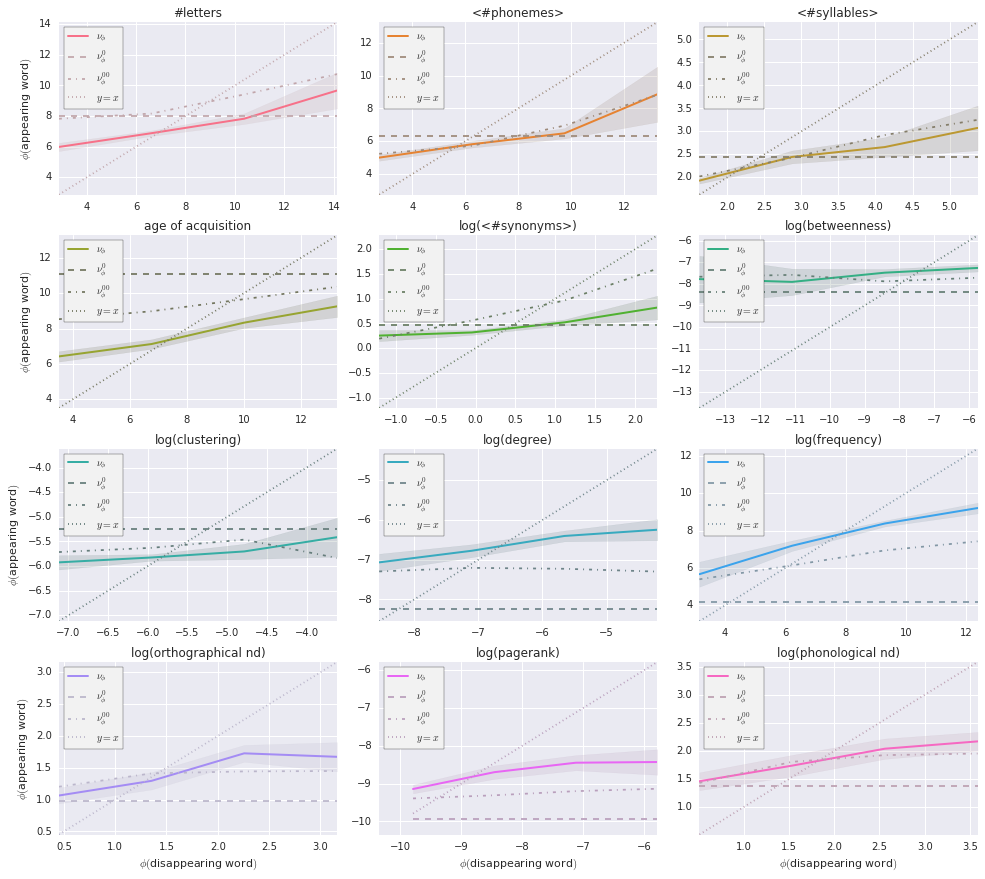

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

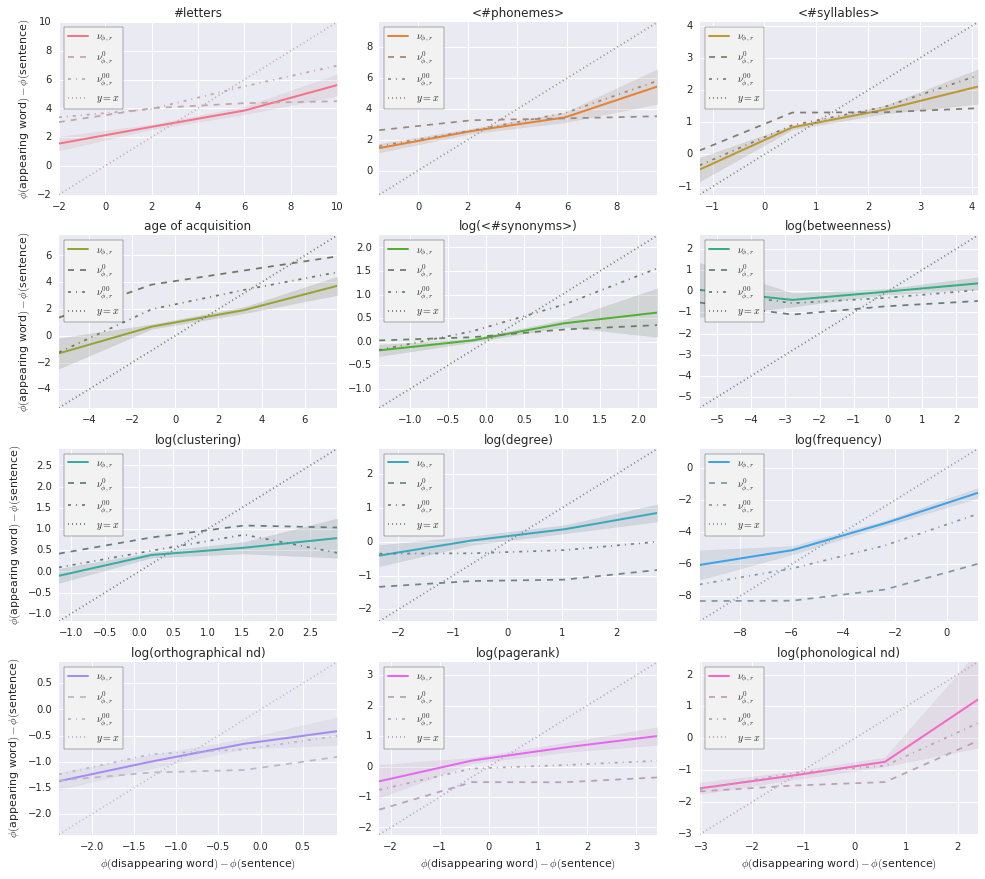

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

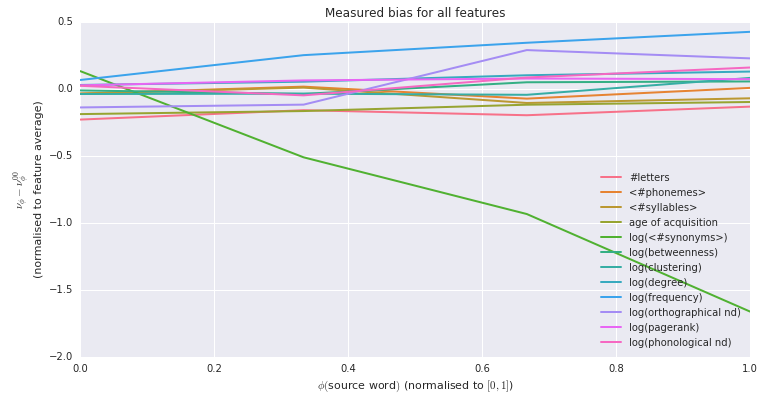

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

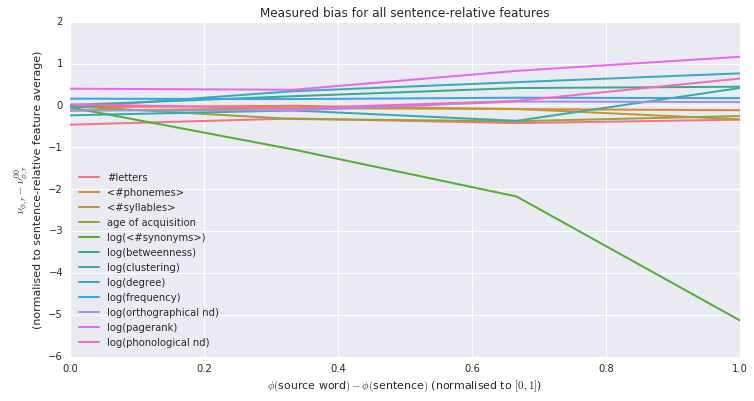

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

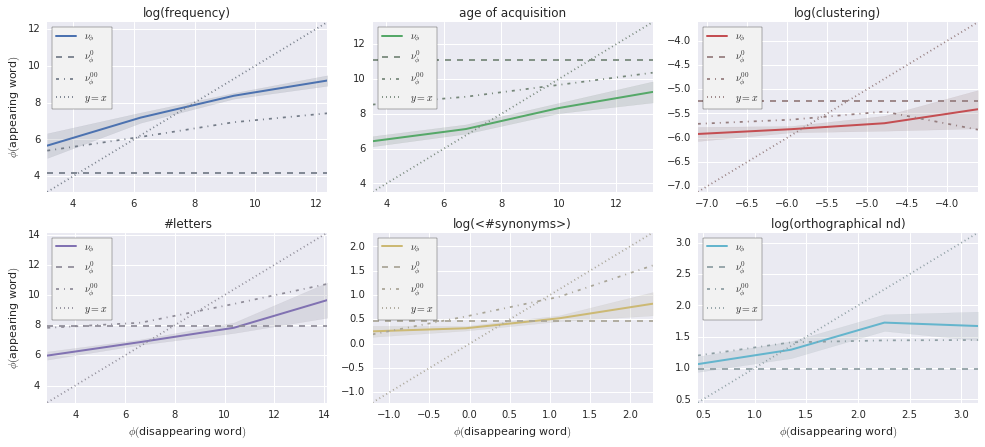

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

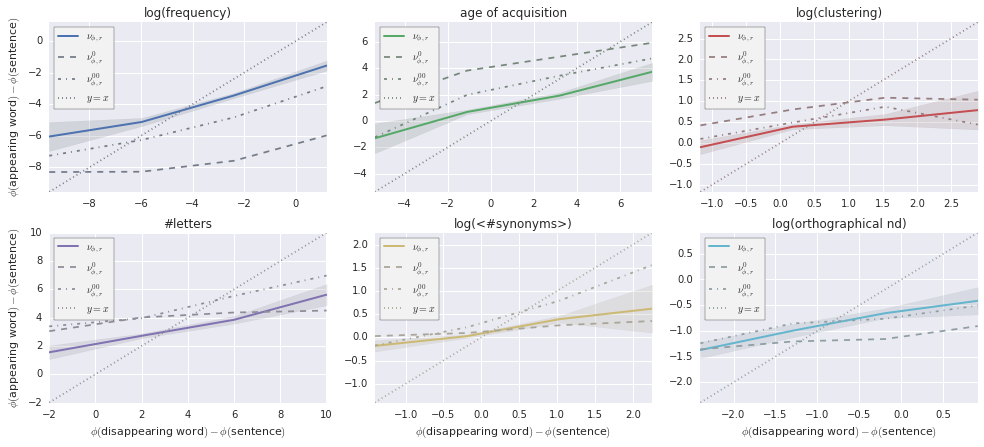

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

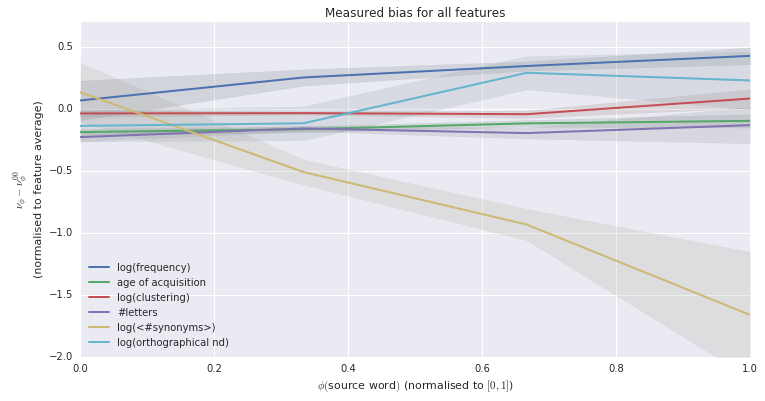

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

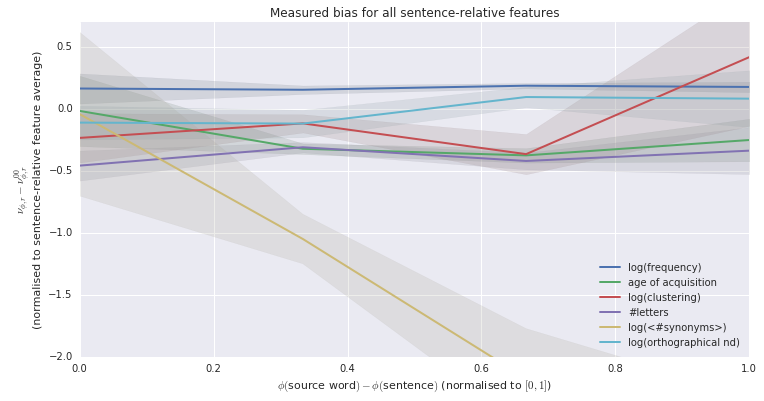

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


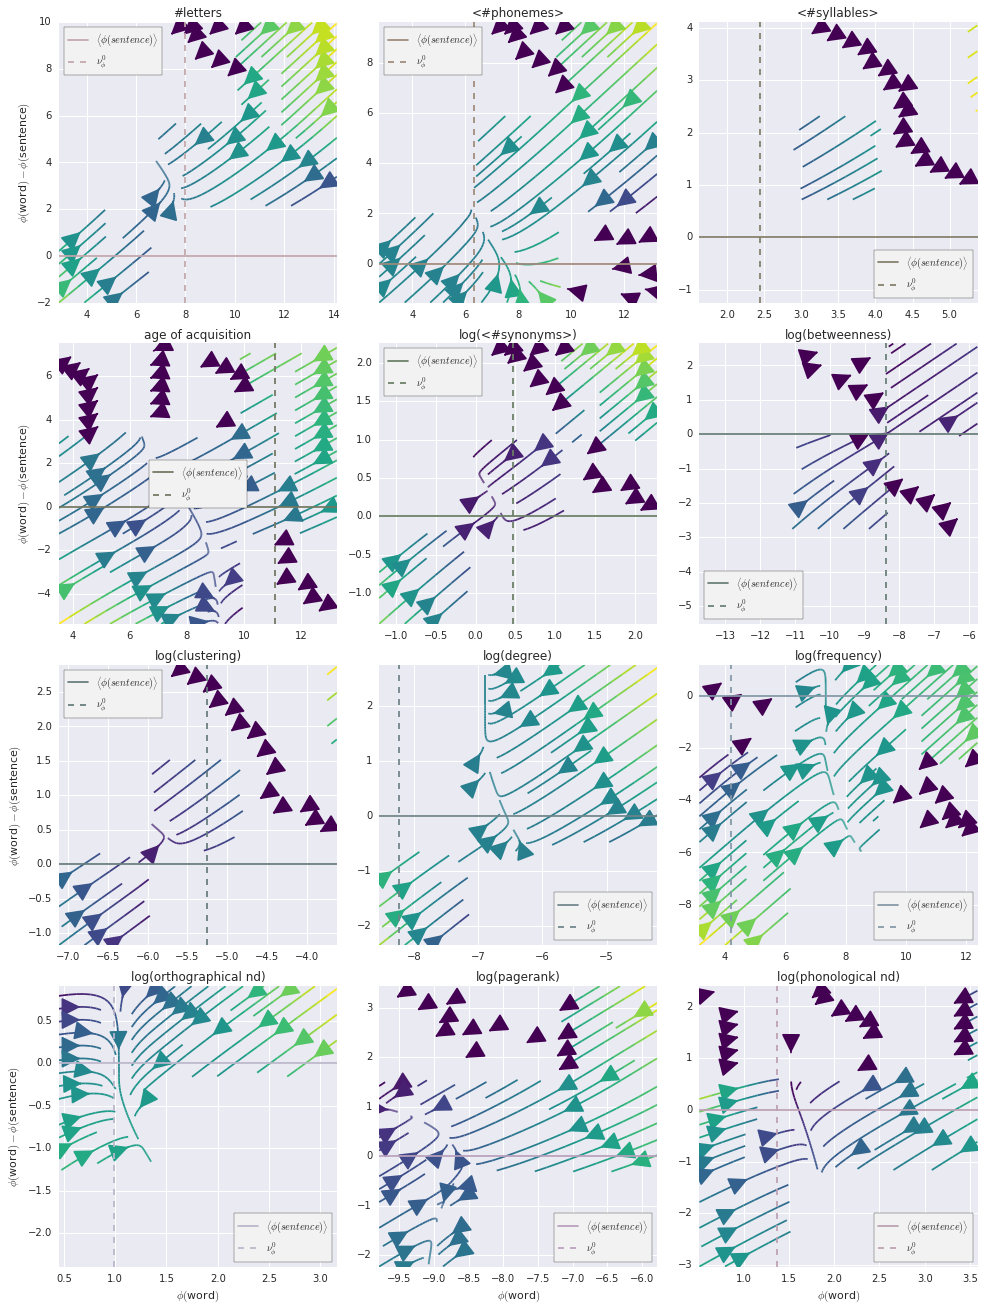

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


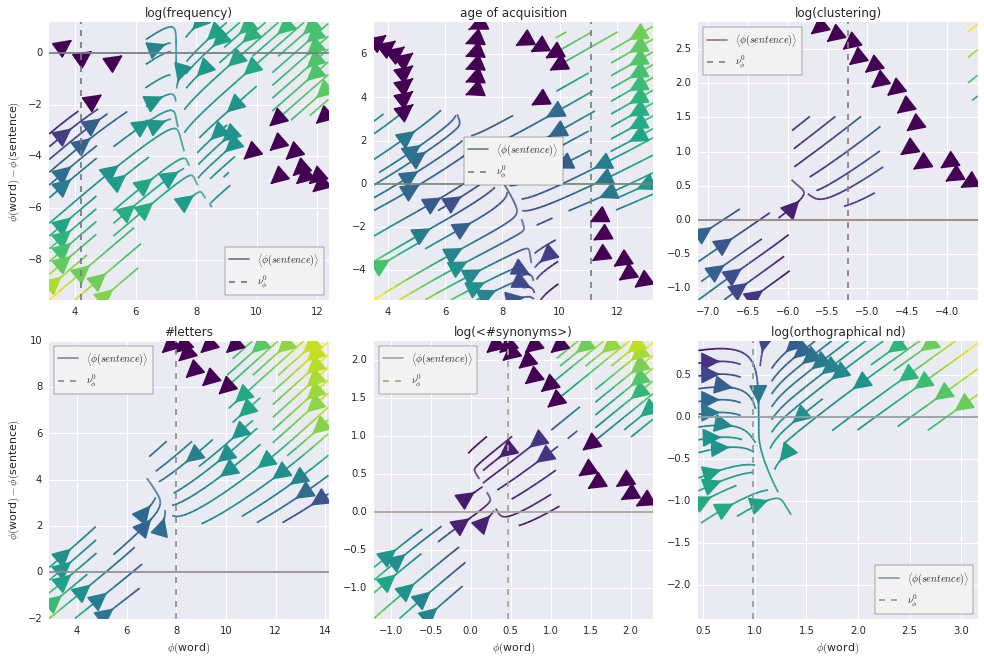

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 11 components.

Those explain the following variance:
[ 0.5072829   0.18364961  0.09281491  0.07368147  0.03424318  0.02961089
  0.02163169  0.01855127  0.01587964  0.01011151  0.00730902]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographical_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.437199,0.313337,-0.089230,0.252240,0.232462,-0.423159,0.227672,0.296692,-0.395866,0.292080,-0.155227,-0.003196
Component-1,0.308386,-0.383678,0.124632,-0.283178,-0.279821,-0.432846,0.187896,-0.301898,-0.429717,0.245588,-0.157563,0.008205
Component-2,0.714301,0.174491,-0.119708,0.062844,0.645827,-0.105856,-0.032180,0.034352,-0.036065,0.064649,0.000597,-0.071090


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 18511) |            | Elapsed Time: 0:00:37 ETA:  8 days, 1:51:19

  0% (  133 of 18511) |                    | Elapsed Time: 0:00:38 ETA:  0:01:41

  1% (  232 of 18511) |                    | Elapsed Time: 0:00:39 ETA:  0:01:40

  2% (  378 of 18511) |                    | Elapsed Time: 0:00:40 ETA:  0:01:34

  2% (  463 of 18511) |                    | Elapsed Time: 0:00:41 ETA:  0:01:36

  3% (  595 of 18511) |                    | Elapsed Time: 0:00:42 ETA:  0:01:36

  3% (  695 of 18511) |                    | Elapsed Time: 0:00:42 ETA:  0:01:34

  4% (  793 of 18511) |                    | Elapsed Time: 0:00:43 ETA:  0:01:39

  4% (  892 of 18511) |                    | Elapsed Time: 0:00:44 ETA:  0:01:43

  5% (  926 of 18511) |#                   | Elapsed Time: 0:00:45 ETA:  0:01:44

  5% ( 1042 of 18511) |#                   | Elapsed Time: 0:00:46 ETA:  0:01:46

  6% ( 1157 of 18511) |#                   | Elapsed Time: 0:00:47 ETA:  0:01:47

  7% ( 1304 of 18511) |#                   | Elapsed Time: 0:00:48 ETA:  0:01:46

  7% ( 1389 of 18511) |#                   | Elapsed Time: 0:00:48 ETA:  0:01:43

  8% ( 1511 of 18511) |#                   | Elapsed Time: 0:00:49 ETA:  0:01:43

  8% ( 1620 of 18511) |#                   | Elapsed Time: 0:00:50 ETA:  0:01:44

  9% ( 1751 of 18511) |#                   | Elapsed Time: 0:00:51 ETA:  0:01:37

 10% ( 1852 of 18511) |##                  | Elapsed Time: 0:00:52 ETA:  0:01:35

 10% ( 2009 of 18511) |##                  | Elapsed Time: 0:00:53 ETA:  0:01:27

 11% ( 2083 of 18511) |##                  | Elapsed Time: 0:00:54 ETA:  0:01:25

 11% ( 2176 of 18511) |##                  | Elapsed Time: 0:00:55 ETA:  0:01:32

 12% ( 2314 of 18511) |##                  | Elapsed Time: 0:00:56 ETA:  0:01:34

 13% ( 2461 of 18511) |##                  | Elapsed Time: 0:00:57 ETA:  0:01:26

 13% ( 2546 of 18511) |##                  | Elapsed Time: 0:00:58 ETA:  0:01:26

 14% ( 2675 of 18511) |##                  | Elapsed Time: 0:00:59 ETA:  0:01:25

 15% ( 2777 of 18511) |###                 | Elapsed Time: 0:00:59 ETA:  0:01:22

 15% ( 2902 of 18511) |###                 | Elapsed Time: 0:01:00 ETA:  0:01:26

 16% ( 3009 of 18511) |###                 | Elapsed Time: 0:01:01 ETA:  0:01:23

 17% ( 3160 of 18511) |###                 | Elapsed Time: 0:01:02 ETA:  0:01:14

 17% ( 3240 of 18511) |###                 | Elapsed Time: 0:01:03 ETA:  0:01:11

 18% ( 3332 of 18511) |###                 | Elapsed Time: 0:01:04 ETA:  0:01:16

 18% ( 3471 of 18511) |###                 | Elapsed Time: 0:01:04 ETA:  0:01:14

 19% ( 3631 of 18511) |###                 | Elapsed Time: 0:01:05 ETA:  0:01:09

 20% ( 3703 of 18511) |####                | Elapsed Time: 0:01:06 ETA:  0:01:06

 20% ( 3806 of 18511) |####                | Elapsed Time: 0:01:07 ETA:  0:01:11

 21% ( 3934 of 18511) |####                | Elapsed Time: 0:01:08 ETA:  0:01:12

 21% ( 4062 of 18511) |####                | Elapsed Time: 0:01:09 ETA:  0:01:14

 22% ( 4165 of 18511) |####                | Elapsed Time: 0:01:10 ETA:  0:01:12

 23% ( 4318 of 18511) |####                | Elapsed Time: 0:01:11 ETA:  0:01:02

 23% ( 4397 of 18511) |####                | Elapsed Time: 0:01:11 ETA:  0:01:04

 24% ( 4551 of 18511) |####                | Elapsed Time: 0:01:12 ETA:  0:01:04

 25% ( 4628 of 18511) |#####               | Elapsed Time: 0:01:13 ETA:  0:01:04

 25% ( 4769 of 18511) |#####               | Elapsed Time: 0:01:14 ETA:  0:00:57

 26% ( 4860 of 18511) |#####               | Elapsed Time: 0:01:14 ETA:  0:00:54

 27% ( 5010 of 18511) |#####               | Elapsed Time: 0:01:15 ETA:  0:00:52

 27% ( 5091 of 18511) |#####               | Elapsed Time: 0:01:16 ETA:  0:00:50

 28% ( 5237 of 18511) |#####               | Elapsed Time: 0:01:17 ETA:  0:00:50

 28% ( 5322 of 18511) |#####               | Elapsed Time: 0:01:18 ETA:  0:00:50

 29% ( 5380 of 18511) |#####               | Elapsed Time: 0:01:21 ETA:  0:01:38

 29% ( 5510 of 18511) |#####               | Elapsed Time: 0:01:22 ETA:  0:01:41

 30% ( 5554 of 18511) |######              | Elapsed Time: 0:01:22 ETA:  0:01:43

 30% ( 5695 of 18511) |######              | Elapsed Time: 0:01:23 ETA:  0:01:41

 31% ( 5785 of 18511) |######              | Elapsed Time: 0:01:24 ETA:  0:01:41

 31% ( 5878 of 18511) |######              | Elapsed Time: 0:01:25 ETA:  0:01:53

 32% ( 5987 of 18511) |######              | Elapsed Time: 0:01:26 ETA:  0:01:53

 32% ( 6017 of 18511) |######              | Elapsed Time: 0:01:26 ETA:  0:02:04

 33% ( 6136 of 18511) |######              | Elapsed Time: 0:01:27 ETA:  0:02:05

 33% ( 6248 of 18511) |######              | Elapsed Time: 0:01:28 ETA:  0:01:02

 34% ( 6356 of 18511) |######              | Elapsed Time: 0:01:29 ETA:  0:01:05

 35% ( 6479 of 18511) |#######             | Elapsed Time: 0:01:30 ETA:  0:01:04

 35% ( 6611 of 18511) |#######             | Elapsed Time: 0:01:31 ETA:  0:01:05

 36% ( 6711 of 18511) |#######             | Elapsed Time: 0:01:31 ETA:  0:01:03

 37% ( 6869 of 18511) |#######             | Elapsed Time: 0:01:32 ETA:  0:00:51

 37% ( 6942 of 18511) |#######             | Elapsed Time: 0:01:33 ETA:  0:00:49

 38% ( 7079 of 18511) |#######             | Elapsed Time: 0:01:34 ETA:  0:00:47

 38% ( 7174 of 18511) |#######             | Elapsed Time: 0:01:35 ETA:  0:00:44

 39% ( 7295 of 18511) |#######             | Elapsed Time: 0:01:36 ETA:  0:00:43

 40% ( 7405 of 18511) |########            | Elapsed Time: 0:01:37 ETA:  0:00:38

 40% ( 7545 of 18511) |########            | Elapsed Time: 0:01:38 ETA:  0:00:35

 41% ( 7636 of 18511) |########            | Elapsed Time: 0:01:38 ETA:  0:00:34

 42% ( 7775 of 18511) |########            | Elapsed Time: 0:01:39 ETA:  0:00:34

 42% ( 7868 of 18511) |########            | Elapsed Time: 0:01:40 ETA:  0:00:37

 43% ( 8013 of 18511) |########            | Elapsed Time: 0:01:41 ETA:  0:00:34

 43% ( 8099 of 18511) |########            | Elapsed Time: 0:01:42 ETA:  0:00:34

 44% ( 8212 of 18511) |########            | Elapsed Time: 0:01:43 ETA:  0:00:36

 45% ( 8330 of 18511) |#########           | Elapsed Time: 0:01:43 ETA:  0:00:32

 45% ( 8454 of 18511) |#########           | Elapsed Time: 0:01:44 ETA:  0:00:34

 46% ( 8562 of 18511) |#########           | Elapsed Time: 0:01:45 ETA:  0:00:35

 47% ( 8701 of 18511) |#########           | Elapsed Time: 0:01:46 ETA:  0:00:33

 47% ( 8793 of 18511) |#########           | Elapsed Time: 0:01:47 ETA:  0:00:37

 48% ( 8952 of 18511) |#########           | Elapsed Time: 0:01:48 ETA:  0:00:32

 48% ( 9025 of 18511) |#########           | Elapsed Time: 0:01:49 ETA:  0:00:34

 49% ( 9181 of 18511) |#########           | Elapsed Time: 0:01:50 ETA:  0:00:29

 50% ( 9256 of 18511) |##########          | Elapsed Time: 0:01:50 ETA:  0:00:25

 50% ( 9383 of 18511) |##########          | Elapsed Time: 0:01:51 ETA:  0:00:26

 51% ( 9487 of 18511) |##########          | Elapsed Time: 0:01:52 ETA:  0:00:24

 52% ( 9643 of 18511) |##########          | Elapsed Time: 0:01:53 ETA:  0:00:19

 52% ( 9719 of 18511) |##########          | Elapsed Time: 0:01:54 ETA:  0:00:22

 53% ( 9841 of 18511) |##########          | Elapsed Time: 0:01:55 ETA:  0:00:18

 53% ( 9950 of 18511) |##########          | Elapsed Time: 0:01:55 ETA:  0:00:18

 54% (10107 of 18511) |##########          | Elapsed Time: 0:01:56 ETA:  0:00:14

 55% (10182 of 18511) |###########         | Elapsed Time: 0:01:57 ETA:  0:00:14

 55% (10264 of 18511) |###########         | Elapsed Time: 0:01:58 ETA:  0:00:21

 56% (10413 of 18511) |###########         | Elapsed Time: 0:01:59 ETA:  0:00:19

 56% (10542 of 18511) |###########         | Elapsed Time: 0:02:00 ETA:  0:00:22

 57% (10644 of 18511) |###########         | Elapsed Time: 0:02:01 ETA:  0:00:18

 58% (10800 of 18511) |###########         | Elapsed Time: 0:02:02 ETA:  0:00:13

 58% (10876 of 18511) |###########         | Elapsed Time: 0:02:02 ETA:  0:00:14

 59% (11027 of 18511) |###########         | Elapsed Time: 0:02:03 ETA:  0:00:14

 60% (11107 of 18511) |############        | Elapsed Time: 0:02:04 ETA:  0:00:15

 60% (11272 of 18511) |############        | Elapsed Time: 0:02:05 ETA:  0:00:02

 61% (11338 of 18511) |############        | Elapsed Time: 0:02:05 ETA:  0:00:00

 61% (11469 of 18511) |############        | Elapsed Time: 0:02:06 ETA:  0:00:01

 62% (11570 of 18511) |############        | Elapsed Time: 0:02:07 ETA:  0:00:00

 63% (11715 of 18511) |############        | Elapsed Time: 0:02:08 ETA:  0:00:00

 63% (11801 of 18511) |############        | Elapsed Time: 0:02:09 ETA:  0:00:00

 64% (11961 of 18511) |############        | Elapsed Time: 0:02:10 ETA:  0:00:00

 65% (12033 of 18511) |#############       | Elapsed Time: 0:02:10 ETA:  0:00:00

 65% (12171 of 18511) |#############       | Elapsed Time: 0:02:11 ETA:  0:00:00

 66% (12264 of 18511) |#############       | Elapsed Time: 0:02:12 ETA:  0:00:00

 67% (12408 of 18511) |#############       | Elapsed Time: 0:02:13 ETA:  0:00:00

 67% (12495 of 18511) |#############       | Elapsed Time: 0:02:13 ETA:  0:00:00

 68% (12636 of 18511) |#############       | Elapsed Time: 0:02:14 ETA:  0:00:00

 68% (12727 of 18511) |#############       | Elapsed Time: 0:02:15 ETA:  0:00:00

 69% (12866 of 18511) |#############       | Elapsed Time: 0:02:16 ETA:  0:00:00

 70% (12958 of 18511) |##############      | Elapsed Time: 0:02:17 ETA:  0:00:00

 70% (13099 of 18511) |##############      | Elapsed Time: 0:02:18 ETA:  0:00:00

 71% (13190 of 18511) |##############      | Elapsed Time: 0:02:18 ETA:  0:00:00

 72% (13335 of 18511) |##############      | Elapsed Time: 0:02:19 ETA:  0:00:00

 72% (13421 of 18511) |##############      | Elapsed Time: 0:02:20 ETA:  0:00:00

 73% (13567 of 18511) |##############      | Elapsed Time: 0:02:21 ETA:  0:00:00

 73% (13652 of 18511) |##############      | Elapsed Time: 0:02:21 ETA:  0:00:00

 74% (13789 of 18511) |##############      | Elapsed Time: 0:02:22 ETA:  0:00:00

 75% (13884 of 18511) |###############     | Elapsed Time: 0:02:23 ETA:  0:00:00

 75% (14034 of 18511) |###############     | Elapsed Time: 0:02:24 ETA:  0:00:00

 76% (14115 of 18511) |###############     | Elapsed Time: 0:02:24 ETA:  0:00:00

 76% (14232 of 18511) |###############     | Elapsed Time: 0:02:25 ETA:  0:00:00

 77% (14347 of 18511) |###############     | Elapsed Time: 0:02:26 ETA:  0:00:00

 78% (14486 of 18511) |###############     | Elapsed Time: 0:02:27 ETA:  0:00:00

 78% (14578 of 18511) |###############     | Elapsed Time: 0:02:28 ETA:  0:00:00

 79% (14718 of 18511) |###############     | Elapsed Time: 0:02:29 ETA:  0:00:00

 80% (14809 of 18511) |################    | Elapsed Time: 0:02:29 ETA:  0:00:00

 80% (14966 of 18511) |################    | Elapsed Time: 0:02:30 ETA:  0:00:00

 81% (15041 of 18511) |################    | Elapsed Time: 0:02:31 ETA:  0:00:00

 81% (15170 of 18511) |################    | Elapsed Time: 0:02:32 ETA:  0:00:00

 82% (15272 of 18511) |################    | Elapsed Time: 0:02:33 ETA:  0:00:00

 83% (15392 of 18511) |################    | Elapsed Time: 0:02:34 ETA:  0:00:00

 83% (15503 of 18511) |################    | Elapsed Time: 0:02:34 ETA:  0:00:00

 84% (15653 of 18511) |################    | Elapsed Time: 0:02:36 ETA:  0:00:00

 85% (15735 of 18511) |#################   | Elapsed Time: 0:02:36 ETA:  0:00:00

 85% (15888 of 18511) |#################   | Elapsed Time: 0:02:37 ETA:  0:00:00

 86% (15966 of 18511) |#################   | Elapsed Time: 0:02:38 ETA:  0:00:00

 87% (16107 of 18511) |#################   | Elapsed Time: 0:02:39 ETA:  0:00:00

 87% (16198 of 18511) |#################   | Elapsed Time: 0:02:39 ETA:  0:00:00

 88% (16342 of 18511) |#################   | Elapsed Time: 0:02:40 ETA:  0:00:00

 88% (16429 of 18511) |#################   | Elapsed Time: 0:02:41 ETA:  0:00:00

 89% (16579 of 18511) |#################   | Elapsed Time: 0:02:42 ETA:  0:00:00

 90% (16660 of 18511) |##################  | Elapsed Time: 0:02:42 ETA:  0:00:00

 90% (16803 of 18511) |##################  | Elapsed Time: 0:02:43 ETA:  0:00:00

 91% (16892 of 18511) |##################  | Elapsed Time: 0:02:44 ETA:  0:00:00

 91% (17008 of 18511) |##################  | Elapsed Time: 0:02:45 ETA:  0:00:00

 92% (17123 of 18511) |##################  | Elapsed Time: 0:02:46 ETA:  0:00:00

 93% (17268 of 18511) |##################  | Elapsed Time: 0:02:47 ETA:  0:00:00

 93% (17355 of 18511) |##################  | Elapsed Time: 0:02:47 ETA:  0:00:00

 94% (17504 of 18511) |##################  | Elapsed Time: 0:02:48 ETA:  0:00:00

 95% (17586 of 18511) |################### | Elapsed Time: 0:02:49 ETA:  0:00:00

 95% (17728 of 18511) |################### | Elapsed Time: 0:02:50 ETA:  0:00:00

 96% (17817 of 18511) |################### | Elapsed Time: 0:02:51 ETA:  0:00:00

 97% (17970 of 18511) |################### | Elapsed Time: 0:02:52 ETA:  0:00:00

 97% (18049 of 18511) |################### | Elapsed Time: 0:02:52 ETA:  0:00:00

 98% (18179 of 18511) |################### | Elapsed Time: 0:02:53 ETA:  0:00:00

 98% (18280 of 18511) |################### | Elapsed Time: 0:02:54 ETA:  0:00:00

 99% (18422 of 18511) |################### | Elapsed Time: 0:02:55 ETA:  0:00:00

100% (18511 of 18511) |####################| Elapsed Time: 0:02:56 Time: 0:02:56


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

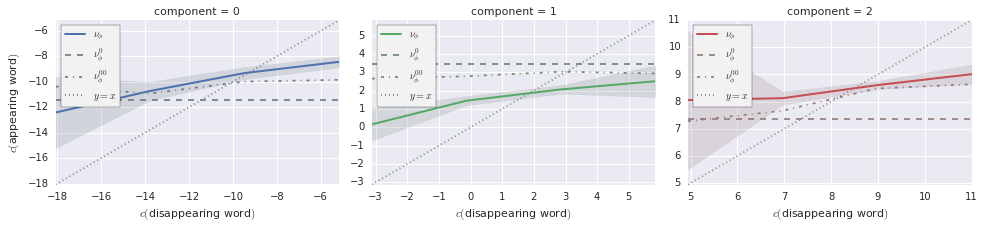

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 4 components.

Those explain the following variance:
[ 0.52729824  0.19343489  0.16683808  0.04503762]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographical_density,synonyms_count
Component-0,-0.678454,-0.098557,0.348231,-0.565198,0.298755,0.004316
Component-1,0.526011,0.086043,-0.352897,-0.713904,0.284122,-0.031431
Component-2,-0.500766,0.117146,-0.850484,0.080020,0.043249,0.062554


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 18511) |           | Elapsed Time: 0:00:11 ETA:  2 days, 13:16:17

  0% (  148 of 18511) |                    | Elapsed Time: 0:00:12 ETA:  0:01:53

  1% (  232 of 18511) |                    | Elapsed Time: 0:00:13 ETA:  0:01:54

  2% (  392 of 18511) |                    | Elapsed Time: 0:00:14 ETA:  0:01:48

  2% (  463 of 18511) |                    | Elapsed Time: 0:00:15 ETA:  0:01:49

  3% (  616 of 18511) |                    | Elapsed Time: 0:00:16 ETA:  0:01:47

  3% (  695 of 18511) |                    | Elapsed Time: 0:00:16 ETA:  0:01:46

  4% (  806 of 18511) |                    | Elapsed Time: 0:00:17 ETA:  0:01:51

  5% (  926 of 18511) |#                   | Elapsed Time: 0:00:18 ETA:  0:01:55

  5% ( 1058 of 18511) |#                   | Elapsed Time: 0:00:19 ETA:  0:01:57

  6% ( 1157 of 18511) |#                   | Elapsed Time: 0:00:20 ETA:  0:01:58

  7% ( 1314 of 18511) |#                   | Elapsed Time: 0:00:21 ETA:  0:01:57

  7% ( 1389 of 18511) |#                   | Elapsed Time: 0:00:21 ETA:  0:01:55

  8% ( 1523 of 18511) |#                   | Elapsed Time: 0:00:22 ETA:  0:01:57

  8% ( 1620 of 18511) |#                   | Elapsed Time: 0:00:23 ETA:  0:01:59

  9% ( 1763 of 18511) |#                   | Elapsed Time: 0:00:24 ETA:  0:01:54

 10% ( 1852 of 18511) |##                  | Elapsed Time: 0:00:25 ETA:  0:01:48

 10% ( 2018 of 18511) |##                  | Elapsed Time: 0:00:26 ETA:  0:01:44

 11% ( 2083 of 18511) |##                  | Elapsed Time: 0:00:26 ETA:  0:01:42

 11% ( 2190 of 18511) |##                  | Elapsed Time: 0:00:27 ETA:  0:01:44

 12% ( 2314 of 18511) |##                  | Elapsed Time: 0:00:28 ETA:  0:01:45

 13% ( 2471 of 18511) |##                  | Elapsed Time: 0:00:29 ETA:  0:01:43

 13% ( 2546 of 18511) |##                  | Elapsed Time: 0:00:30 ETA:  0:01:42

 14% ( 2694 of 18511) |##                  | Elapsed Time: 0:00:31 ETA:  0:01:38

 15% ( 2777 of 18511) |###                 | Elapsed Time: 0:00:31 ETA:  0:01:36

 15% ( 2920 of 18511) |###                 | Elapsed Time: 0:00:32 ETA:  0:01:35

 16% ( 3009 of 18511) |###                 | Elapsed Time: 0:00:33 ETA:  0:01:37

 17% ( 3165 of 18511) |###                 | Elapsed Time: 0:00:34 ETA:  0:01:34

 17% ( 3240 of 18511) |###                 | Elapsed Time: 0:00:34 ETA:  0:01:28

 18% ( 3355 of 18511) |###                 | Elapsed Time: 0:00:35 ETA:  0:01:30

 18% ( 3471 of 18511) |###                 | Elapsed Time: 0:00:36 ETA:  0:01:29

 19% ( 3644 of 18511) |###                 | Elapsed Time: 0:00:37 ETA:  0:01:25

 20% ( 3703 of 18511) |####                | Elapsed Time: 0:00:37 ETA:  0:01:23

 20% ( 3825 of 18511) |####                | Elapsed Time: 0:00:38 ETA:  0:01:26

 21% ( 3934 of 18511) |####                | Elapsed Time: 0:00:39 ETA:  0:01:26

 22% ( 4076 of 18511) |####                | Elapsed Time: 0:00:40 ETA:  0:01:26

 22% ( 4165 of 18511) |####                | Elapsed Time: 0:00:41 ETA:  0:01:25

 23% ( 4331 of 18511) |####                | Elapsed Time: 0:00:42 ETA:  0:01:23

 23% ( 4397 of 18511) |####                | Elapsed Time: 0:00:42 ETA:  0:01:18

 24% ( 4565 of 18511) |####                | Elapsed Time: 0:00:43 ETA:  0:01:17

 25% ( 4628 of 18511) |#####               | Elapsed Time: 0:00:44 ETA:  0:01:19

 25% ( 4781 of 18511) |#####               | Elapsed Time: 0:00:45 ETA:  0:01:18

 26% ( 4860 of 18511) |#####               | Elapsed Time: 0:00:45 ETA:  0:01:13

 27% ( 5022 of 18511) |#####               | Elapsed Time: 0:00:46 ETA:  0:01:10

 27% ( 5091 of 18511) |#####               | Elapsed Time: 0:00:47 ETA:  0:01:08

 28% ( 5255 of 18511) |#####               | Elapsed Time: 0:00:48 ETA:  0:01:08

 28% ( 5322 of 18511) |#####               | Elapsed Time: 0:00:48 ETA:  0:01:08

 29% ( 5469 of 18511) |#####               | Elapsed Time: 0:00:49 ETA:  0:01:07

 30% ( 5554 of 18511) |######              | Elapsed Time: 0:00:49 ETA:  0:01:08

 30% ( 5719 of 18511) |######              | Elapsed Time: 0:00:50 ETA:  0:01:06

 31% ( 5785 of 18511) |######              | Elapsed Time: 0:00:51 ETA:  0:01:05

 31% ( 5895 of 18511) |######              | Elapsed Time: 0:00:52 ETA:  0:01:10

 32% ( 6017 of 18511) |######              | Elapsed Time: 0:00:53 ETA:  0:01:11

 33% ( 6154 of 18511) |######              | Elapsed Time: 0:00:54 ETA:  0:01:12

 33% ( 6248 of 18511) |######              | Elapsed Time: 0:00:54 ETA:  0:01:14

 34% ( 6379 of 18511) |######              | Elapsed Time: 0:00:55 ETA:  0:01:15

 35% ( 6479 of 18511) |#######             | Elapsed Time: 0:00:56 ETA:  0:01:15

 35% ( 6630 of 18511) |#######             | Elapsed Time: 0:00:57 ETA:  0:01:14

 36% ( 6711 of 18511) |#######             | Elapsed Time: 0:00:58 ETA:  0:01:15

 37% ( 6880 of 18511) |#######             | Elapsed Time: 0:00:59 ETA:  0:01:11

 37% ( 6942 of 18511) |#######             | Elapsed Time: 0:00:59 ETA:  0:01:07

 38% ( 7096 of 18511) |#######             | Elapsed Time: 0:01:00 ETA:  0:01:05

 38% ( 7174 of 18511) |#######             | Elapsed Time: 0:01:01 ETA:  0:01:03

 39% ( 7318 of 18511) |#######             | Elapsed Time: 0:01:02 ETA:  0:01:02

 40% ( 7405 of 18511) |########            | Elapsed Time: 0:01:02 ETA:  0:00:58

 40% ( 7560 of 18511) |########            | Elapsed Time: 0:01:03 ETA:  0:00:56

 41% ( 7636 of 18511) |########            | Elapsed Time: 0:01:04 ETA:  0:00:55

 42% ( 7791 of 18511) |########            | Elapsed Time: 0:01:05 ETA:  0:00:55

 42% ( 7868 of 18511) |########            | Elapsed Time: 0:01:05 ETA:  0:00:57

 43% ( 8027 of 18511) |########            | Elapsed Time: 0:01:06 ETA:  0:00:54

 43% ( 8099 of 18511) |########            | Elapsed Time: 0:01:07 ETA:  0:00:55

 44% ( 8230 of 18511) |########            | Elapsed Time: 0:01:08 ETA:  0:00:56

 45% ( 8330 of 18511) |#########           | Elapsed Time: 0:01:08 ETA:  0:00:53

 45% ( 8470 of 18511) |#########           | Elapsed Time: 0:01:09 ETA:  0:00:54

 46% ( 8562 of 18511) |#########           | Elapsed Time: 0:01:10 ETA:  0:00:54

 47% ( 8718 of 18511) |#########           | Elapsed Time: 0:01:11 ETA:  0:00:52

 47% ( 8793 of 18511) |#########           | Elapsed Time: 0:01:12 ETA:  0:00:55

 48% ( 8971 of 18511) |#########           | Elapsed Time: 0:01:13 ETA:  0:00:50

 48% ( 9025 of 18511) |#########           | Elapsed Time: 0:01:13 ETA:  0:00:51

 49% ( 9196 of 18511) |#########           | Elapsed Time: 0:01:14 ETA:  0:00:48

 50% ( 9256 of 18511) |##########          | Elapsed Time: 0:01:14 ETA:  0:00:44

 50% ( 9399 of 18511) |##########          | Elapsed Time: 0:01:15 ETA:  0:00:46

 51% ( 9487 of 18511) |##########          | Elapsed Time: 0:01:16 ETA:  0:00:44

 52% ( 9655 of 18511) |##########          | Elapsed Time: 0:01:17 ETA:  0:00:41

 52% ( 9719 of 18511) |##########          | Elapsed Time: 0:01:18 ETA:  0:00:43

 53% ( 9864 of 18511) |##########          | Elapsed Time: 0:01:19 ETA:  0:00:40

 53% ( 9950 of 18511) |##########          | Elapsed Time: 0:01:19 ETA:  0:00:41

 54% (10121 of 18511) |##########          | Elapsed Time: 0:01:20 ETA:  0:00:38

 55% (10182 of 18511) |###########         | Elapsed Time: 0:01:20 ETA:  0:00:38

 55% (10285 of 18511) |###########         | Elapsed Time: 0:01:21 ETA:  0:00:44

 56% (10413 of 18511) |###########         | Elapsed Time: 0:01:22 ETA:  0:00:42

 57% (10561 of 18511) |###########         | Elapsed Time: 0:01:23 ETA:  0:00:41

 57% (10644 of 18511) |###########         | Elapsed Time: 0:01:24 ETA:  0:00:43

 58% (10811 of 18511) |###########         | Elapsed Time: 0:01:25 ETA:  0:00:38

 58% (10876 of 18511) |###########         | Elapsed Time: 0:01:25 ETA:  0:00:36

 59% (11038 of 18511) |###########         | Elapsed Time: 0:01:26 ETA:  0:00:35

 60% (11107 of 18511) |############        | Elapsed Time: 0:01:27 ETA:  0:00:37

 60% (11284 of 18511) |############        | Elapsed Time: 0:01:28 ETA:  0:00:34

 61% (11338 of 18511) |############        | Elapsed Time: 0:01:28 ETA:  0:00:27

 62% (11483 of 18511) |############        | Elapsed Time: 0:01:29 ETA:  0:00:27

 62% (11570 of 18511) |############        | Elapsed Time: 0:01:30 ETA:  0:00:26

 63% (11734 of 18511) |############        | Elapsed Time: 0:01:31 ETA:  0:00:23

 63% (11801 of 18511) |############        | Elapsed Time: 0:01:31 ETA:  0:00:22

 64% (11973 of 18511) |############        | Elapsed Time: 0:01:32 ETA:  0:00:20

 65% (12033 of 18511) |#############       | Elapsed Time: 0:01:32 ETA:  0:00:19

 65% (12188 of 18511) |#############       | Elapsed Time: 0:01:33 ETA:  0:00:19

 66% (12264 of 18511) |#############       | Elapsed Time: 0:01:34 ETA:  0:00:20

 67% (12424 of 18511) |#############       | Elapsed Time: 0:01:35 ETA:  0:00:19

 67% (12495 of 18511) |#############       | Elapsed Time: 0:01:35 ETA:  0:00:17

 68% (12652 of 18511) |#############       | Elapsed Time: 0:01:36 ETA:  0:00:16

 68% (12727 of 18511) |#############       | Elapsed Time: 0:01:37 ETA:  0:00:17

 69% (12887 of 18511) |#############       | Elapsed Time: 0:01:38 ETA:  0:00:17

 70% (12958 of 18511) |##############      | Elapsed Time: 0:01:38 ETA:  0:00:18

 70% (13117 of 18511) |##############      | Elapsed Time: 0:01:39 ETA:  0:00:17

 71% (13190 of 18511) |##############      | Elapsed Time: 0:01:40 ETA:  0:00:17

 72% (13354 of 18511) |##############      | Elapsed Time: 0:01:41 ETA:  0:00:15

 72% (13421 of 18511) |##############      | Elapsed Time: 0:01:41 ETA:  0:00:15

 73% (13587 of 18511) |##############      | Elapsed Time: 0:01:42 ETA:  0:00:13

 73% (13652 of 18511) |##############      | Elapsed Time: 0:01:42 ETA:  0:00:11

 74% (13806 of 18511) |##############      | Elapsed Time: 0:01:43 ETA:  0:00:10

 75% (13884 of 18511) |###############     | Elapsed Time: 0:01:44 ETA:  0:00:09

 75% (14052 of 18511) |###############     | Elapsed Time: 0:01:45 ETA:  0:00:07

 76% (14115 of 18511) |###############     | Elapsed Time: 0:01:45 ETA:  0:00:07

 76% (14249 of 18511) |###############     | Elapsed Time: 0:01:46 ETA:  0:00:08

 77% (14347 of 18511) |###############     | Elapsed Time: 0:01:47 ETA:  0:00:07

 78% (14503 of 18511) |###############     | Elapsed Time: 0:01:48 ETA:  0:00:06

 78% (14578 of 18511) |###############     | Elapsed Time: 0:01:48 ETA:  0:00:09

 79% (14736 of 18511) |###############     | Elapsed Time: 0:01:49 ETA:  0:00:09

 80% (14809 of 18511) |################    | Elapsed Time: 0:01:50 ETA:  0:00:08

 80% (14979 of 18511) |################    | Elapsed Time: 0:01:51 ETA:  0:00:07

 81% (15041 of 18511) |################    | Elapsed Time: 0:01:51 ETA:  0:00:07

 82% (15190 of 18511) |################    | Elapsed Time: 0:01:52 ETA:  0:00:08

 82% (15272 of 18511) |################    | Elapsed Time: 0:01:53 ETA:  0:00:04

 83% (15412 of 18511) |################    | Elapsed Time: 0:01:54 ETA:  0:00:06

 83% (15503 of 18511) |################    | Elapsed Time: 0:01:54 ETA:  0:00:06

 84% (15670 of 18511) |################    | Elapsed Time: 0:01:55 ETA:  0:00:02

 85% (15735 of 18511) |#################   | Elapsed Time: 0:01:56 ETA:  0:00:01

 85% (15898 of 18511) |#################   | Elapsed Time: 0:01:57 ETA:  0:00:00

 86% (15966 of 18511) |#################   | Elapsed Time: 0:01:57 ETA:  0:00:01

 87% (16123 of 18511) |#################   | Elapsed Time: 0:01:58 ETA:  0:00:00

 87% (16198 of 18511) |#################   | Elapsed Time: 0:01:59 ETA:  0:00:00

 88% (16358 of 18511) |#################   | Elapsed Time: 0:02:00 ETA:  0:00:00

 88% (16429 of 18511) |#################   | Elapsed Time: 0:02:00 ETA:  0:00:00

 89% (16591 of 18511) |#################   | Elapsed Time: 0:02:01 ETA:  0:00:00

 90% (16660 of 18511) |##################  | Elapsed Time: 0:02:02 ETA:  0:00:00

 90% (16815 of 18511) |##################  | Elapsed Time: 0:02:03 ETA:  0:00:00

 91% (16892 of 18511) |##################  | Elapsed Time: 0:02:03 ETA:  0:00:00

 91% (17028 of 18511) |##################  | Elapsed Time: 0:02:04 ETA:  0:00:00

 92% (17123 of 18511) |##################  | Elapsed Time: 0:02:05 ETA:  0:00:00

 93% (17279 of 18511) |##################  | Elapsed Time: 0:02:06 ETA:  0:00:00

 93% (17355 of 18511) |##################  | Elapsed Time: 0:02:06 ETA:  0:00:00

 94% (17514 of 18511) |##################  | Elapsed Time: 0:02:07 ETA:  0:00:00

 95% (17586 of 18511) |################### | Elapsed Time: 0:02:08 ETA:  0:00:00

 95% (17740 of 18511) |################### | Elapsed Time: 0:02:09 ETA:  0:00:00

 96% (17817 of 18511) |################### | Elapsed Time: 0:02:09 ETA:  0:00:00

 97% (17979 of 18511) |################### | Elapsed Time: 0:02:10 ETA:  0:00:00

 97% (18049 of 18511) |################### | Elapsed Time: 0:02:11 ETA:  0:00:00

 98% (18194 of 18511) |################### | Elapsed Time: 0:02:12 ETA:  0:00:00

 98% (18280 of 18511) |################### | Elapsed Time: 0:02:12 ETA:  0:00:00

 99% (18430 of 18511) |################### | Elapsed Time: 0:02:13 ETA:  0:00:00

100% (18511 of 18511) |####################| Elapsed Time: 0:02:14 Time: 0:02:14


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

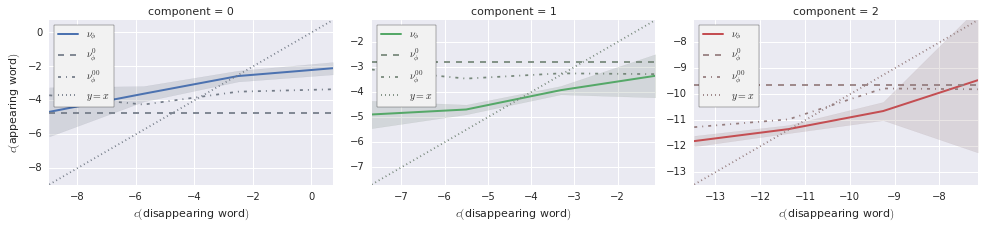

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographical_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 1746 (cluster-unique) substitutions, but the PCA is in fact computed on 551 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.